In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
from textblob import TextBlob
import plotly.express as px

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
init_notebook_mode(connected=True)


from operator import itemgetter

In [2]:
import nltk # imports the natural language toolkit
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/denise/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/denise/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
train = pd.read_csv('nlp-getting-started/train.csv')
test = pd.read_csv('nlp-getting-started/test.csv')

## Examine the data

* **id:** A unique ID to identify the tweet.
* **keyword:** A keyword from the tweet .
* **location:** The location the tweet was sent from.
* **text:** Text from tweet.
* **target:**  This denotes whether a tweet is about a real disaster (1) or not (0).
</font>

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
print("train shape:", train.shape)
print("test shape:", test.shape)

train shape: (7613, 5)
test shape: (3263, 4)


### Missing Values

We could see that we have a equal distribution for missing values on training and testing data.
We are filling them with "Not Found".

In [6]:
missing_cols = ['keyword', 'location']

<AxesSubplot:>

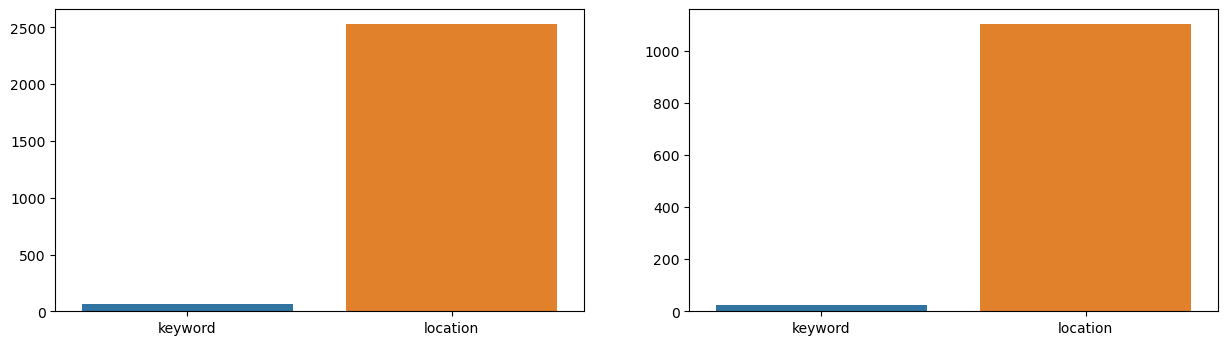

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 4), dpi=100)

sns.barplot(x=train[missing_cols].isnull().sum().index,
            y=train[missing_cols].isnull().sum().values, ax=axes[0])

sns.barplot(x=test[missing_cols].isnull().sum().index,
            y=test[missing_cols].isnull().sum().values, ax=axes[1])

In [8]:
train['keyword'].fillna('Not Found', inplace=True)
train['location'].fillna('Not Found', inplace=True)

### Couting and getting false review indicatives

Here we are doind some analysis with unigrams, bigrams and trigrams.


In [9]:
def get_word_counter(list_reviews):
    vectorizer = CountVectorizer(stop_words='english')
    
    matrix_count = vectorizer.fit_transform(list_reviews)
    freqs = zip(vectorizer.get_feature_names(), matrix_count.sum(axis=0).tolist()[0])
    
    return sorted(freqs, key=lambda x: -x[1])

In [10]:
real_disaster_tweets = train.loc[train['target'] == 1]['text']
non_disaster_tweets = train.loc[train['target'] == 0]['text']

non_disaster_tweets_counter = get_word_counter(non_disaster_tweets)
real_disaster_tweets_counter = get_word_counter(real_disaster_tweets)
all_tweets_counter = get_word_counter(train['text'])

In [11]:
df2 = pd.DataFrame(non_disaster_tweets_counter,
                   columns = ['text' , 'count'])

fig = px.bar(df2[:20],
             x='text',
             y='count',
             title="Non Disaster Tweets - Top Words Count")
fig.show()


In [12]:
df2 = pd.DataFrame(real_disaster_tweets_counter,
                   columns = ['text' , 'count'])

fig = px.bar(df2[:20],
             x='text',
             y='count',
             title="Real Disaster Tweets - Top Words Count")
fig.show()


In [13]:
all_tweets_counter[:10]

[('http', 4309),
 ('https', 411),
 ('like', 348),
 ('û_', 348),
 ('amp', 344),
 ('just', 323),
 ('new', 226),
 ('people', 200),
 ('news', 197),
 ('don', 190)]

In [14]:
non_disaster_tweets_counter_dict = dict(non_disaster_tweets_counter[:500])
real_disaster_tweets_counter_dict = dict(real_disaster_tweets_counter[:500])

non_disaster_tweets_indicative = {key:value for key,value in non_disaster_tweets_counter_dict.items()
                           if key not in real_disaster_tweets_counter_dict}
                           
non_disaster_tweets_indicative = sorted(non_disaster_tweets_indicative.items(), key=lambda x: -x[1])[:10]                           

In [15]:
df2 = pd.DataFrame(non_disaster_tweets_indicative,
                   columns = ['text' , 'count'])

fig = px.bar(df2[:20],
             x='text',
             y='count',
             title="Non Disaster Indicatives - Top Words Count")
fig.show()


### bigrams

In [16]:
def get_word_counter_w_more_words(list_reviews, number_of_words):
    vectorizer = CountVectorizer(stop_words='english',
                                ngram_range=(number_of_words, number_of_words))
    
    matrix_count = vectorizer.fit_transform(list_reviews)
    freqs = zip(vectorizer.get_feature_names(), matrix_count.sum(axis=0).tolist()[0])
    
    return sorted(freqs, key=lambda x: -x[1])

In [17]:
non_disaster_tweets_counter_bigram = get_word_counter_w_more_words(non_disaster_tweets, 2)
real_disaster_tweets_counter_bigram = get_word_counter_w_more_words(real_disaster_tweets, 2)

In [18]:
df2 = pd.DataFrame(real_disaster_tweets_counter_bigram,
                   columns = ['text' , 'count'])

fig = px.bar(df2[:20],
             x='text',
             y='count',
             title="Real Disaster Tweets - Top Words Count")
fig.show()


In [19]:
df2 = pd.DataFrame(non_disaster_tweets_counter_bigram,
                   columns = ['text' , 'count'])

fig = px.bar(df2[:20],
             x='text',
             y='count',
             title="Non Disaster Tweets - Top Words Count")
fig.show()


### trigrams

In [20]:
non_disaster_tweets_counter_trigram = get_word_counter_w_more_words(non_disaster_tweets, 3)
real_disaster_tweets_counter_trigram = get_word_counter_w_more_words(real_disaster_tweets, 3)

In [21]:
df2 = pd.DataFrame(real_disaster_tweets_counter_trigram,
                   columns = ['text' , 'count'])

fig = px.bar(df2[:20],
             x='text',
             y='count',
             title="Real Disaster Tweets - Top Words Count")
fig.show()


In [22]:
df2 = pd.DataFrame(non_disaster_tweets_counter_trigram,
                   columns = ['text' , 'count'])

fig = px.bar(df2[:20],
             x='text',
             y='count',
             title="Non Disaster Tweets - Top Words Count")
fig.show()


## Len and Word counter

We could see that we have different distributions for word counter and text length for disaster and non disasters. In tweets related to disasters we have a higher number of words and a lower text length.

In [23]:
train['text_len'] = train['text'].astype(str).apply(len)
test['text_len'] = test['text'].astype(str).apply(len)

train['text_counter'] = train['text'].apply(lambda x: len(str(x).split()))
test['text_counter'] = test['text'].apply(lambda x: len(str(x).split()))

In [24]:
fig = px.histogram(train,
                   x="text_counter",
                   color="target",
                   title="Text Counter Distribution",
                   marginal="box",
                   color_discrete_map={1: "RebeccaPurple",
                                       0: "MediumPurple"
                                      },
                   )

fig.show()

In [25]:
import plotly.express as px

fig = px.histogram(train,
                   x="text_len",
                   color="target",
                   title="Text Len Distribution",
                   marginal="box",
                   color_discrete_map={1: "RebeccaPurple",
                                       0: "MediumPurple"
                                      },
                   )

fig.show()

### Part-Of-Speech Tagging (POS)

In [26]:
blob = TextBlob(str(train.loc[train['target']==1]['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for real disaster tweets')

In [27]:
blob = TextBlob(str(train.loc[train['target']==0]['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for non disaster tweets')

In [28]:
blob = TextBlob(str(train['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for all tweets')

## Helper Functions

In [36]:
regular_expression_map = {
    'url': 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',
    'mention': r'(?<=@)\w+',
    'hashtag': '(?<=#)\w+'
}

In [30]:
def find_expression(input_sequence, regular_expression): 
        text = re.findall(regular_expression,
                          input_sequence)
        return "".join(text)

In [31]:
def remove_expression(input_sequence, regular_expression):

        return re.sub(regular_expression,
                      '',
                      input_sequence)

### Url

Here we could see different distributions for the presence of urls on disaster/non-disaster tweets.

For tweets related to disasters, we have a higher number of tweets with url link.

In [32]:
train['url'] = train['text'].apply(lambda x: find_expression(x, regular_expression_map['url']))
train['has_url'] = np.where(train['url'] == '', 0, 1)

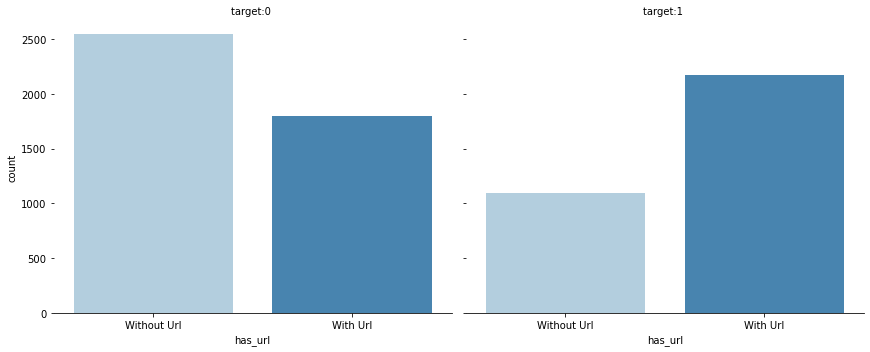

In [33]:

g = sns.catplot(x="has_url", kind='count',
                data=train, col='target',
                height=5, aspect=1.2,
                palette="Blues")

(g.set_xticklabels(["Without Url", "With Url"])
  .set_titles("{col_var}:{col_name} ")
  .despine(left=True))  

### mention

In [34]:
train['mention'] = train['text'].apply(lambda x: find_expression(x, regular_expression_map['mention']))
train['has_mention'] = np.where(train['mention'] == '', 0, 1)

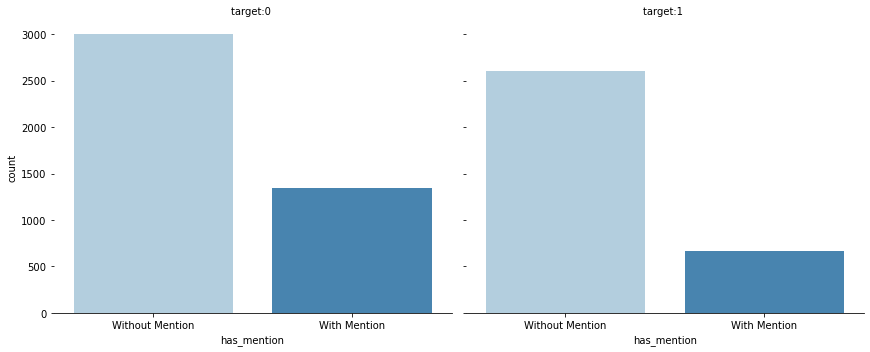

In [39]:

g = sns.catplot(x="has_mention", kind='count',
                data=train, col='target',
                height=5, aspect=1.2,
                palette="Blues")

(g.set_xticklabels(["Without Mention", "With Mention"])
  .set_titles("{col_var}:{col_name} ")
  .despine(left=True))  

### hashtag

In [37]:
train['hashtag'] = train['text'].apply(lambda x: find_expression(x, regular_expression_map['hashtag']))
train['has_hashtag'] = np.where(train['hashtag'] == '', 0, 1)

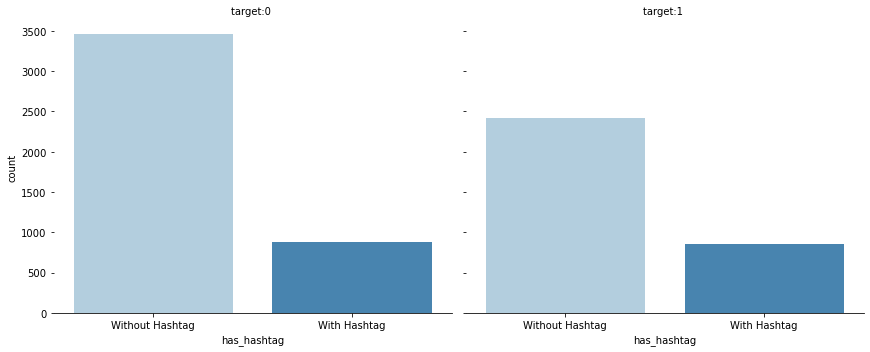

In [40]:

g = sns.catplot(x="has_hashtag", kind='count',
                data=train, col='target',
                height=5, aspect=1.2,
                palette="Blues")

(g.set_xticklabels(["Without Hashtag", "With Hashtag"])
  .set_titles("{col_var}:{col_name} ")
  .despine(left=True))  

## Final dataset

#### cleaning dataset

In [41]:
train['text_edited']  = train['text'].apply(lambda x: remove_expression(x, regular_expression_map['url']))
train['text_edited']  = train['text_edited'].apply(lambda x: remove_expression(x, regular_expression_map['mention']))
train['text_edited']  = train['text_edited'].apply(lambda x: remove_expression(x, regular_expression_map['hashtag']))

In [42]:
train.head()

,id,keyword,location,text,target,text_len,text_counter,url,has_url,mention,has_mention,hashtag,has_hashtag,text_edited
0,1,Not Found,Not Found,Our Deeds are the Reason of this #earthquake M...,1,69,13,,0,,0,earthquake,1,Our Deeds are the Reason of this # May ALLAH F...
1,4,Not Found,Not Found,Forest fire near La Ronge Sask. Canada,1,38,7,,0,,0,,0,Forest fire near La Ronge Sask. Canada
2,5,Not Found,Not Found,All residents asked to 'shelter in place' are ...,1,133,22,,0,,0,,0,All residents asked to 'shelter in place' are ...
3,6,Not Found,Not Found,"13,000 people receive #wildfires evacuation or...",1,65,8,,0,,0,wildfires,1,"13,000 people receive # evacuation orders in C..."
4,7,Not Found,Not Found,Just got sent this photo from Ruby #Alaska as ...,1,88,16,,0,,0,Alaskawildfires,1,Just got sent this photo from Ruby # as smoke ...


In [43]:
train.loc[train['has_mention'] == 1]

,id,keyword,location,text,target,text_len,text_counter,url,has_url,mention,has_mention,hashtag,has_hashtag,text_edited
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,5,http://t.co/lHYXEOHY6C,1,bbcmtd,1,,0,@ Wholesale Markets ablaze
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0,122,21,,0,PhDSquares,1,mufc,1,@ # they've built so much hype around new acqu...
43,63,ablaze,Not Found,SOOOO PUMPED FOR ABLAZE ???? @southridgelife,0,44,6,,0,southridgelife,1,,0,SOOOO PUMPED FOR ABLAZE ???? @
54,78,ablaze,Abuja,Noches El-Bestia '@Alexis_Sanchez: happy to se...,0,130,15,http://t.co/uc4j4jHvGR',1,Alexis_Sanchez,1,,0,Noches El-Bestia '@: happy to see my teammates...
63,91,ablaze,"Concord, CA",@Navista7 Steve these fires out here are somet...,1,138,23,,0,Navista7News24680,1,,0,@ Steve these fires out here are something els...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0,107,21,,0,widda16,1,whoops,1,@ ... He's gone. You can relax. I thought the ...
7578,10830,wrecked,Not Found,@jt_ruff23 @cameronhacker and I wrecked you both,0,48,7,,0,jt_ruff23cameronhacker,1,,0,@ @ and I wrecked you both
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0,104,13,http://t.co/oMNBAtJEAO,1,engineshed,1,,0,@ Great atmosphere at the British Lion gig ton...
7596,10851,Not Found,Not Found,RT @LivingSafely: #NWS issues Severe #Thunders...,1,134,18,http://t.co/FWqfCKNCQW,1,LivingSafely,1,NWSThunderstormARNCOK,1,RT @: # issues Severe # Warnings for parts of ...


In [44]:
train['mention'].value_counts()

                           5604
YouTube                      60
Change                        9
djicemoon                     7
POTUS                         6
                           ... 
VileLunar                     1
CyhiThePrynce                 1
bridgeportspeed               1
pollsterrealdonaldtrump       1
engineermataRAI               1
Name: mention, Length: 1795, dtype: int64